In [2]:
import dateutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 
                            1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

In [7]:
np.log2(fr_filt[fr_quant_filenames_in_analytical_order])

,20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),...,20210729_AJ_Toh_RatBloodGlucose_T1092M_20210410_10wk_FBG.raw (F45),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210325_8wk_RBG.raw (F30),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210325_8wk_RBG.raw (F10),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210330_8wk_RBG.raw (F48),20210729_AJ_Toh_RatBloodGlucose_T1074M_20210329_9wk_FBG.raw (F19),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG.raw (F14),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210330_8wk_RBG.raw (F54),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210330_8wk_RBG.raw (F42),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210413_10wk_RBG.raw (F46)
Unique Identifier,,,,,,,,,,,,,,,,,,,,,
unknown_679.05463_0.536,20.405355,23.313111,23.218699,24.012349,24.302356,23.901455,23.883301,23.387975,24.421692,23.463756,...,22.462249,23.360916,22.399150,23.163419,22.737840,22.116533,23.352451,23.527438,23.858693,23.617549
unknown_641.1087_0.537,21.533648,24.586227,24.375151,25.685664,25.422294,24.936916,24.779941,24.696276,25.054941,24.934805,...,24.663849,23.700392,23.382317,24.385568,23.789670,22.248759,22.513249,24.558075,24.818525,24.575904
unknown_951.15973_0.541,20.665848,23.731244,23.038733,24.916555,24.042666,24.162971,23.627979,24.085858,23.169508,24.010849,...,23.452626,22.549975,23.249352,23.680978,23.989589,23.527507,24.002570,23.886203,24.069137,23.455789
unknown_329.03067_0.542,24.400930,26.811664,26.708762,25.977120,27.313654,27.337061,27.415597,27.230430,27.598719,27.126653,...,27.210668,26.194952,26.911119,26.805997,26.145097,26.638404,27.217392,26.970428,27.175265,26.482705
unknown_969.13147_0.544,19.378685,22.709669,21.722467,23.985839,22.321161,23.184906,22.795191,22.878785,22.397716,22.703282,...,22.602208,21.905509,22.226570,22.485669,22.208159,22.236114,23.151359,22.823820,21.750593,22.047030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unknown_897.82532_20.148,18.897008,19.348489,21.529536,17.921098,20.133479,17.824376,18.836779,19.255315,18.261890,19.685160,...,18.604841,18.755897,18.996482,20.095162,17.759520,18.908638,18.093365,17.607114,17.326455,16.927718
unknown_974.9118_20.163,16.810111,17.364343,20.099612,18.430542,17.986741,18.099621,18.145468,14.496938,18.854601,18.324624,...,16.326408,19.046476,18.653201,18.635659,17.382575,17.575165,18.798950,16.704255,18.420810,17.646532
unknown_593.58716_20.175,17.724121,19.240306,21.430516,17.488155,19.996615,17.383197,18.282680,19.507853,17.718258,19.526233,...,18.815858,18.693961,18.778798,20.192346,17.113028,18.925197,17.773412,17.541022,16.974304,16.687194


In [9]:
file_grouping

,analytical_run_order,fr_name,rat_label,bg_type,quant_file,week,lipidex_file_number,date,glucose_tolerance,bg
File Name,,,,,,,,,,
20210729_AJ_Toh_RatBloodGlucose_Water_R1,1,20210729_AJ_Toh_RatBloodGlucose_Water_R1.raw (...,NaN,NaN,False,NaN,65,NaN,NaN,NaN
20210729_AJ_Toh_RatBloodGlucose_Water_R2,2,20210729_AJ_Toh_RatBloodGlucose_Water_R2.raw (...,NaN,NaN,False,NaN,66,NaN,NaN,NaN
20210729_AJ_Toh_RatBloodGlucose_Water_R3,3,20210729_AJ_Toh_RatBloodGlucose_Water_R3.raw (...,NaN,NaN,False,NaN,67,NaN,NaN,NaN
20210729_AJ_Toh_RatBloodGlucose_SolventBlank,4,20210729_AJ_Toh_RatBloodGlucose_SolventBlank.r...,NaN,NaN,False,NaN,2,NaN,NaN,NaN
20210729_AJ_Toh_RatBloodGlucose_ExtractionBlank,5,20210729_AJ_Toh_RatBloodGlucose_ExtractionBlan...,NaN,NaN,False,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG,63,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021040...,1062.0,RBG,True,9.0,14,2021-04-01,impaired,250.5
20210729_AJ_Toh_RatBloodGlucose_T1101M_20210330_8wk_RBG,64,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021033...,1101.0,RBG,True,8.0,54,2021-03-30,diabetic,459.5
20210729_AJ_Toh_RatBloodGlucose_T1092M_20210330_8wk_RBG,65,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021033...,1092.0,RBG,True,8.0,42,2021-03-30,impaired,76.0


Text(0.02, 0.5, 'log2 feature quant')

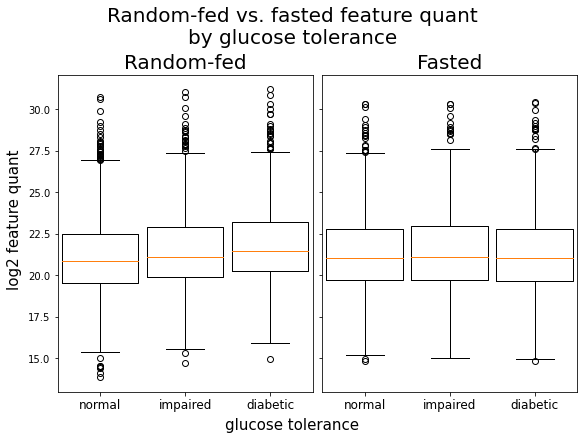

In [37]:
df = np.log2(fr_filt[fr_quant_filenames_in_analytical_order])

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, constrained_layout=True)
fig.set_size_inches((8, 6))

for ax, bg_type in zip(axs, ['RBG', 'FBG']):
    for tol_type, position in zip(['normal', 'impaired', 'diabetic'], [1,2,3]):
        # Get filenames that match bg_type and tol_type
        cols = file_grouping[(file_grouping['bg_type'] == bg_type) & \
                             (file_grouping['glucose_tolerance'] == tol_type) & \
                             (file_grouping['quant_file'] == True)]['fr_name']
        ax.boxplot(df[cols].mean(axis=1), positions=[position, ], widths=0.9)

    ax.set_title('Random-fed' if bg_type == 'RBG' else 'Fasted', fontsize=20)
    ax.set_xticks([1,2,3], )
    ax.set_xticklabels(['normal', 'impaired', 'diabetic'], fontsize=12)

fig.suptitle('Random-fed vs. fasted feature quant\nby glucose tolerance', fontsize=20)
fig.supxlabel('glucose tolerance', fontsize=15)
fig.supylabel('log2 feature quant', fontsize=15)
